# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/appl_1980_2014.csv)

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/appl_1980_2014.csv")

### Step 3. Assign it to a variable apple

In [5]:
apple = df

### Step 4.  Check out the type of the columns

In [6]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [7]:
apple.Date = pd.to_datetime(apple.Date)

### Step 6.  Set the date as the index

In [14]:
apple.index = apple.Date
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2014-07-08,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [17]:
apple.Date.duplicated().any()

False

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [18]:
apple.sort_index(ascending = True)

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-12,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [29]:
apple.groupby([df.index.year,df.index.month]).apply(lambda x: x.index.max())

Date  Date
1980  12     1980-12-31
1981  1      1981-01-30
      2      1981-02-27
      3      1981-03-31
      4      1981-04-30
                ...    
2014  3      2014-03-31
      4      2014-04-30
      5      2014-05-30
      6      2014-06-30
      7      2014-07-08
Length: 404, dtype: datetime64[ns]

### Step 10.  What is the difference in days between the first day and the oldest

In [34]:
print(apple.iloc[0,:])
print(apple.iloc[-1,:])


Date         2014-07-08 00:00:00
Open                       96.27
High                        96.8
Low                        93.92
Close                      95.35
Volume                  65130000
Adj Close                  95.35
Name: 2014-07-08 00:00:00, dtype: object
Date         1980-12-12 00:00:00
Open                       28.75
High                       28.87
Low                        28.75
Close                      28.75
Volume                 117258400
Adj Close                   0.45
Name: 1980-12-12 00:00:00, dtype: object


### Step 11.  How many months in the data we have?

In [35]:
apple.groupby([df.index.year,df.index.month]).apply(lambda x: x.index.max()).shape

(404,)

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [41]:
data = apple['Adj Close'].values
index = range(data.shape[0])
data


array([95.35, 95.97, 94.03, ...,  0.39,  0.42,  0.45])

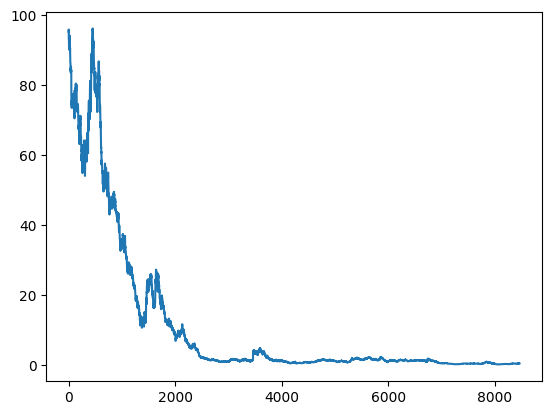

In [43]:
plt.plot(index,data)

### BONUS: Create your own question and answer it.